<a href="https://colab.research.google.com/github/Willlee0225/nbviewer/blob/master/Transferlearning_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

import matplotlib.pyplot as plt
import numpy as np
# Layers for FNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
# Layers for CNN
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
# For data preprocessing
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

## 讀入資料

In [0]:
(X_train, y_train0), (X_test, y_test0) = datasets.cifar10.load_data()

### 將資料整理


In [0]:
name_list = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## 資料處理（Data Processing)

In [0]:
X_train.shape

(50000, 32, 32, 3)

In [0]:
y_train0.shape

(50000, 1)

In [0]:
y_train.shape

(50000, 10)

### 標準化資料

In [0]:
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

In [0]:
# One-hot encoding
y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)

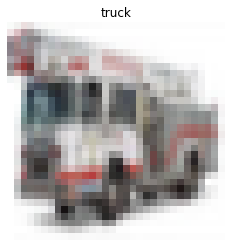

In [0]:

idx = np.random.randint(X_train.shape[0])
x_sample = X_train[idx]
y_sample = y_train0[idx].squeeze()

plt.imshow(x_sample)
plt.title(name_list[y_sample])
plt.axis('off');

## 建立用於分類 CIFAR 10 的卷積神經網路，用於分類A資料集
### 修改部分：將卷積層的filter數量改為32, 128, 512，並將全連接層的神經元數量下修至128。

In [0]:
CNN_layers = [Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', name='Conv_1'),
              MaxPool2D(),
              Conv2D(128, (3, 3), padding='same', activation='relu', name='Conv_2'),
              MaxPool2D(),
              Conv2D(512, (3, 3), padding='same', activation='relu', name='Conv_3'),
              GlobalAveragePooling2D()]

FC_layers = [Dense(units=128, activation='relu'),
             Dense(units=10, activation='softmax')]



In [0]:
model = Sequential(CNN_layers+FC_layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 16, 16, 128)       36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 8, 8, 512)         590336    
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               6

## 訓練模型

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['categorical_accuracy'])
model.fit(X_train, y_train, batch_size=64, epochs=10,validation_data=(X_test, y_test))


Epoch 1/10
782/782 [==============================] - 5s 7ms/step - loss: 1.7015 - categorical_accuracy: 0.3627 - val_loss: 1.3975 - val_categorical_accuracy: 0.4897
Epoch 2/10
782/782 [==============================] - 5s 6ms/step - loss: 1.3318 - categorical_accuracy: 0.5158 - val_loss: 1.3107 - val_categorical_accuracy: 0.5139
Epoch 3/10
782/782 [==============================] - 5s 6ms/step - loss: 1.1640 - categorical_accuracy: 0.5797 - val_loss: 1.1100 - val_categorical_accuracy: 0.5972
Epoch 4/10
782/782 [==============================] - 5s 6ms/step - loss: 1.0551 - categorical_accuracy: 0.6241 - val_loss: 0.9933 - val_categorical_accuracy: 0.6469
Epoch 5/10
782/782 [==============================] - 5s 6ms/step - loss: 0.9721 - categorical_accuracy: 0.6540 - val_loss: 0.9592 - val_categorical_accuracy: 0.6611
Epoch 6/10
782/782 [==============================] - 5s 6ms/step - loss: 0.9011 - categorical_accuracy: 0.6794 - val_loss: 0.9571 - val_categorical_accuracy: 0.6609
Epoc

## 存下模型

In [0]:
model.save_weights('transferlearning_HW_cifar10.h5')

## 模型預測

In [0]:
model.load_weights('transferlearning_HW_cifar10.h5')

score_train = model.evaluate(X_train, y_train)
score_test = model.evaluate(X_test, y_test)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

313/313 [==============================] - 1s 3ms/step - loss: 0.8579 - categorical_accuracy: 0.6981
Train Accuracy: 73.38799834251404
Test Accuracy: 69.80999708175659


## Transfer Learning
### Model 是使用cifar10，model2借用Model的部分模型來用，資料使用Fashion Mnist和A資料集借用卷積層的權重，新增fasion Mnist自己的全連接層。
## 讀入 Fasion mnist


In [0]:
from tensorflow.keras.datasets import fashion_mnist
(X_train_2, y_train_2), (X_test_2, y_test_2) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

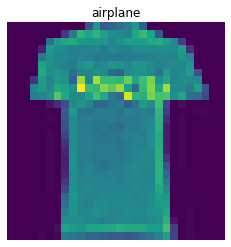

In [0]:
idx = np.random.randint(X_train_2.shape[0])
x_sample_2 = X_train_2[idx]
y_sample_2 = y_train_2[idx].squeeze()

plt.imshow(x_sample_2)
plt.title(name_list[y_sample_2])
plt.axis('off');

## 資料處理（Data Processing)
### 標準化資料

In [0]:
X_train_2 = X_train_2.reshape(60000, 28, 28, 1)/255
X_test_2 = X_test_2.reshape(10000, 28, 28, 1)/255

In [0]:
# One-hot encoding
from tensorflow.keras.utils import to_categorical

y_train_2 = to_categorical(y_train_2, 10)
y_test_2 = to_categorical(y_test_2, 10)

## 建立Model2模型

In [0]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

### 用Sequential建構CNN Layers for mnist

### 將卷積層的filter數量改為32, 128, 512，並將全連接層的神經元數量下修至128。

In [0]:
CNN_layers_mnist = [Conv2D(32, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu', name='Conv_1'),
              MaxPool2D(),
              Conv2D(128, (3, 3), padding='same', activation='relu', name='Conv_2'),
              MaxPool2D(),
              Conv2D(512, (3, 3), padding='same', activation='relu', name='Conv_3'),
              GlobalAveragePooling2D()]
            


## 應用Transfer Learning : 使用model的FC_layer

In [0]:
model2 = Sequential(CNN_layers_mnist+FC_layers)
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 14, 14, 128)       36992     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 7, 7, 512)         590336    
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 128)              

## 採Frozen的訓練方式

In [0]:
for layer in FC_layers:
    layer.trainable = False

## 訓練模型

In [0]:

model2.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['categorical_accuracy'])



In [0]:
model2.fit(X_train_2, y_train_2, batch_size=64, epochs=10,validation_data=(X_test_2, y_test_2))

Epoch 1/10
938/938 [==============================] - 5s 5ms/step - loss: 0.6672 - categorical_accuracy: 0.7598 - val_loss: 0.4641 - val_categorical_accuracy: 0.8391
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 0.4304 - categorical_accuracy: 0.8477 - val_loss: 0.4024 - val_categorical_accuracy: 0.8566
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3617 - categorical_accuracy: 0.8701 - val_loss: 0.4014 - val_categorical_accuracy: 0.8552
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3228 - categorical_accuracy: 0.8845 - val_loss: 0.3303 - val_categorical_accuracy: 0.8822
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2986 - categorical_accuracy: 0.8939 - val_loss: 0.3169 - val_categorical_accuracy: 0.8889
Epoch 6/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2771 - categorical_accuracy: 0.9006 - val_loss: 0.3078 - val_categorical_accuracy: 0.8910
Epoc

## 存下模型

In [0]:
model2.save_weights('transferlearning_HW_mnist.h5')

## 模型預測

In [0]:
model2.load_weights('transferlearning_HW_mnist.h5')

score_train = model2.evaluate(X_train_2, y_train_2)
score_test = model2.evaluate(X_test_2, y_test_2)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

313/313 [==============================] - 1s 2ms/step - loss: 0.2919 - categorical_accuracy: 0.8972
Train Accuracy: 91.58499836921692
Test Accuracy: 89.71999883651733


## 查看舊模型的預測

In [0]:
score_train = model.evaluate(X_train, y_train)
score_test = model.evaluate(X_test, y_test)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

313/313 [==============================] - 1s 3ms/step - loss: 0.8579 - categorical_accuracy: 0.6981
Train Accuracy: 73.38799834251404
Test Accuracy: 69.80999708175659


## 小結：
### 可見舊模型之預測表現不受遷移學習後影響，在訓練新模型中並沒有將借來的神經網路重新訓練